# Caluclating Permuation Entropy of Patient 14's EEG Data
## 1) Load EEG data

In [6]:
import numpy as np

# Load data from text file
eeg_data = np.loadtxt('D:\\users\\meyy2\\Documents\\University 2024 - Year 2\\Research Project\\Patient 14 EEG.txt')
print(eeg_data[:10])

[ -97.85  -96.45 -107.95 -120.75  -94.95  -96.4   -96.85 -102.7  -104.5
 -117.5 ]


## 2) Band filter

In [21]:
from scipy.signal import butter, filtfilt

# Define band filter
def band_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Sampling frequency = 128 Hz
fs = 128

# Apply filters for each band
delta_band = band_filter(eeg_data, 0.5, 4, fs) # 0.5 to 4 Hz
theta_band = band_filter(eeg_data, 4, 8, fs) # 4 to 8 Hz
alpha_band = band_filter(eeg_data, 8, 13, fs) # 8 to 13 Hz
beta_band = band_filter(eeg_data, 13, 30, fs) # 13 to 30 Hz
gamma_band = band_filter(eeg_data, 30, 63, fs) # 30 to 63 Hz (within Nyquist range)

## 3) Separate beta band into overlapping windows

In [ ]:
# Create overlapping 56 s windows of beta band, advancing by 1 s
def moving_window(data, window_size, step_size, fs):
    num_points = len(data)
    window_length = window_size * fs # Length of window in data points
    step_length = step_size * fs # Length of step in data points
    windows = []
    for start in range(0, num_points - window_length + 1, step_length):
        windows.append(data[start:start + window_length])
    return np.array(windows)

window_size = 56 # Length of window in seconds
step_size = 1 # Length of step in seconds
beta_windows = moving_window(beta_band, window_size, step_size, fs)

In [19]:
print(beta_windows.shape) ## Check window count and number of data points in each

(3001, 7168)


## 4) Calculate permutation entropy of each window

In [47]:
from pyentrp import entropy as ent

pe_values = []
for window in beta_windows:
    pe = ent.permutation_entropy(window, order=3, delay=1)
    pe_values.append(pe)

pe_values = np.array(pe_values)

print(pe_values[:1000])

[2.31195394 2.31245531 2.30945991 2.30873769 2.30720994 2.30694083
 2.30645725 2.30694866 2.30726579 2.30621358 2.30546564 2.30448329
 2.30220363 2.30374709 2.30272808 2.30502037 2.3052735  2.3067677
 2.3057335  2.30420195 2.30386056 2.30309179 2.30206933 2.30266112
 2.3011008  2.29982645 2.30158138 2.30077331 2.29976046 2.29955286
 2.29974564 2.29742925 2.2946482  2.29155098 2.28761782 2.28596704
 2.28574597 2.28358479 2.28191893 2.27847102 2.27770265 2.27582796
 2.275564   2.27452081 2.2746651  2.27566313 2.27490886 2.27355472
 2.2724629  2.27305997 2.27274367 2.27261788 2.27018138 2.26718249
 2.26610417 2.26477481 2.26309287 2.26002021 2.26056852 2.25930727
 2.26088966 2.25895799 2.25786485 2.25650803 2.25577323 2.25545749
 2.25232866 2.25012072 2.25006232 2.24767299 2.24404695 2.24152679
 2.23729725 2.23464663 2.23204423 2.23040016 2.2288636  2.22958402
 2.22848519 2.22504845 2.22440689 2.22616224 2.22475287 2.22329613
 2.22387509 2.2230404  2.22070065 2.22273749 2.2222307  2.22310

## 5) Plot permutation entropy values

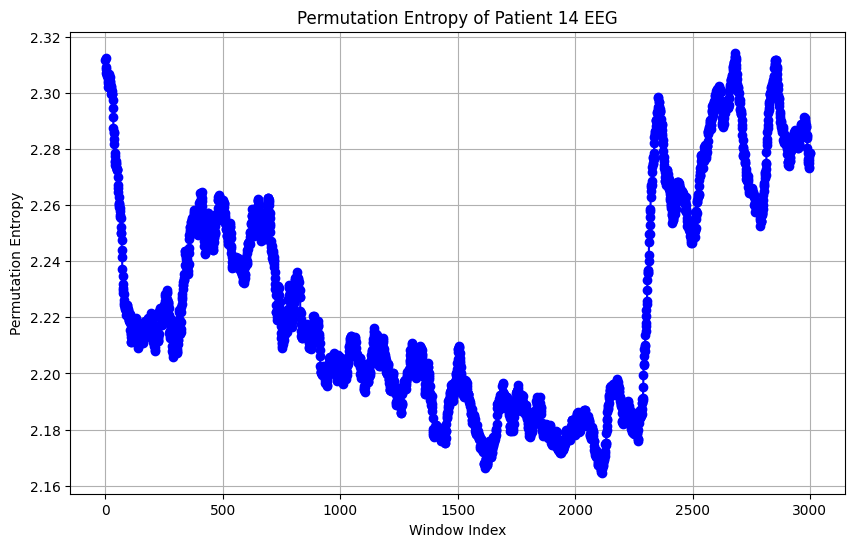

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pe_values, marker='o', linestyle='-', color='b')
plt.title('Permutation Entropy of Patient 14 EEG')
plt.xlabel('Window Index')
plt.ylabel('Permutation Entropy')
plt.grid(True)
plt.show()

## Comparison with Bispectral Index (BIS)

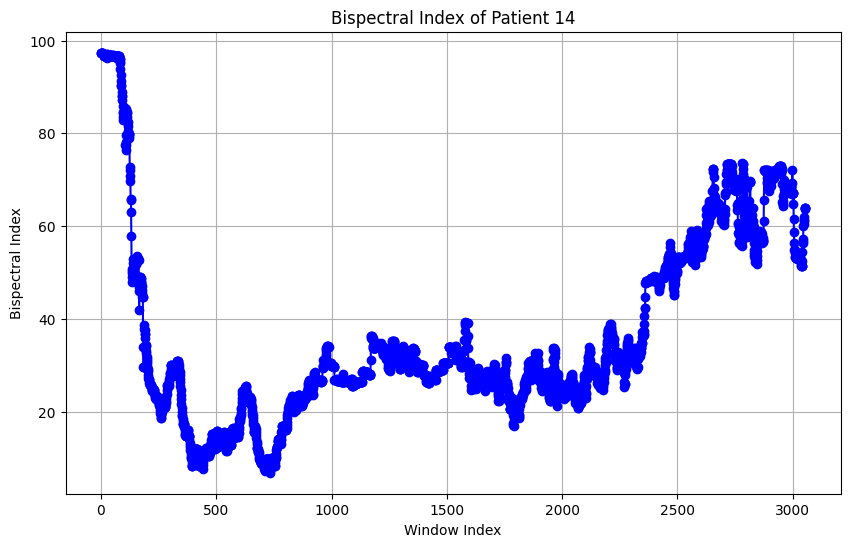

In [43]:
patient14_bis = np.loadtxt('D:\\users\\meyy2\\Documents\\University 2024 - Year 2\\Research Project\\Patient 14 BIS.txt')
plt.figure(figsize=(10, 6))
plt.plot(patient14_bis, marker='o', linestyle='-', color='b')
plt.title('Bispectral Index of Patient 14')
plt.xlabel('Window Index')
plt.ylabel('Bispectral Index')
plt.grid(True)
plt.show()